# Linear Regression

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from pathlib import Path
import statsmodels.formula.api as smf
import sklearn
from sklearn import datasets

# Load Data

In [32]:
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Clean up column names
iris_df.columns = [col.replace(' (cm)', '').replace(' ','_') for col in iris_df.columns]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [33]:
# Re-order the data
new_indexes = np.random.permutation(iris_df.index)
iris_df2 = iris_df.reindex(new_indexes) #.reset_index(drop=True)
# iris_df2

# EDA

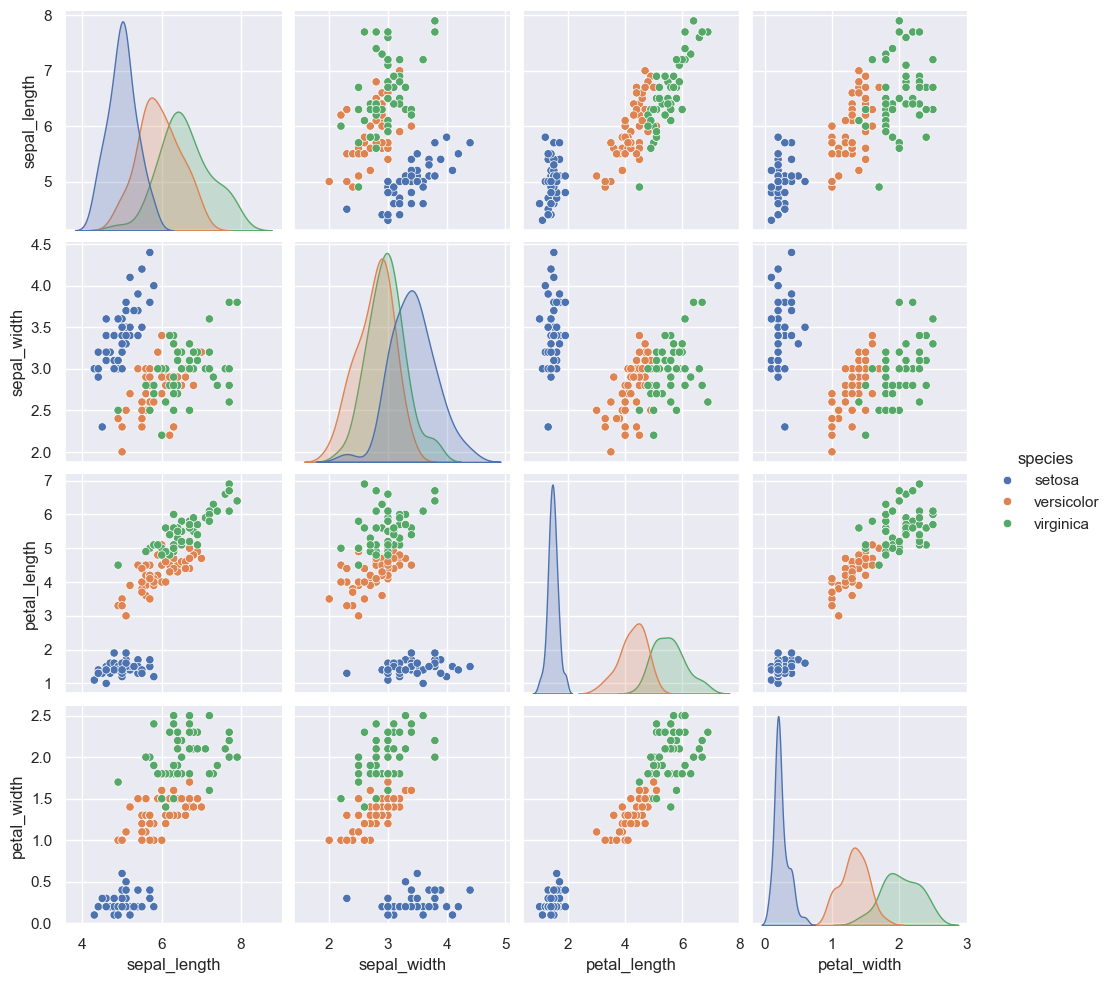

In [34]:
sns.pairplot(iris_df, hue='species')

In [35]:
# for col in iris_df.columns[:-1]:
#     sns.boxplot(x='species', y=col, data=iris_df)
#     plt.show()

# Sklearn

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [60]:


X = iris_df2.drop('species', axis='columns')
y = iris_df2['species']

tree_model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5)
# tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [62]:
y_preds = tree_model.predict(X)
accuracy = sklearn.metrics.accuracy_score(y, y_preds)
print(f'Accuracy: {accuracy}')
accuracy = (y == y_preds).mean()
print(f'Accuracy: {accuracy}')

Accuracy: 0.9733333333333334
Accuracy: 0.9733333333333334


In [49]:
results_df = iris_df2.copy()
results_df['predicted_species'] = y_preds

results_df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_species
29,4.7,3.2,1.6,0.2,setosa,setosa
76,6.8,2.8,4.8,1.4,versicolor,versicolor
121,5.6,2.8,4.9,2.0,virginica,virginica
134,6.1,2.6,5.6,1.4,virginica,virginica
138,6.0,3.0,4.8,1.8,virginica,virginica
...,...,...,...,...,...,...
53,5.5,2.3,4.0,1.3,versicolor,versicolor
45,4.8,3.0,1.4,0.3,setosa,setosa
10,5.4,3.7,1.5,0.2,setosa,setosa
69,5.6,2.5,3.9,1.1,versicolor,versicolor


In [56]:
connfusion_matrix = pd.pivot_table(results_df, index='predicted_species', columns='species', values='sepal_length', aggfunc='count',observed=True).fillna(0)
connfusion_matrix

species,setosa,versicolor,virginica
predicted_species,,,
setosa,50.0,0.0,0.0
versicolor,0.0,47.0,1.0
virginica,0.0,3.0,49.0


## Plot

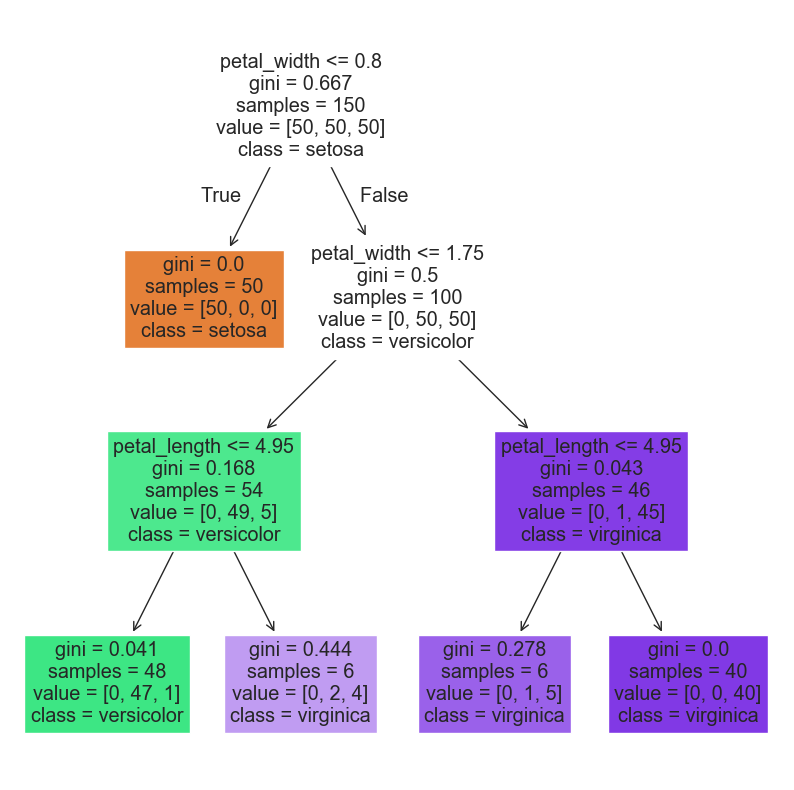

In [71]:
# fig, ax = plt.subplots(figsize=(17, 20))
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=iris_data.target_names, filled=True, ax=ax);

# Homegrown

# The End